In [1]:
import ROOT
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [17]:
def get_reduced_chi2_hists(df_pipkmks, df_pimkpks, particle):
    particles = {
        'pion': ('pip1', 'pim1'),
        'kaon': ('km', 'kp'),
        'proton': ('p', 'p')
    }

    hist_pipkmks_track = df_pipkmks.Define(f'{particles[particle][0]}_chi2ndf_trk', f'{particles[particle][0]}_chisq_trk/{particles[particle][0]}_ndf_trk') \
        .Histo2D((f'pipkmks_{particles[particle][0]}_chi2ndf_trk', 'Track #Chi^{2}/ndf vs M(K^{-}K_{s}#pi^{+}) for ' + particles[particle][0], 40, 1.1, 1.5, 50, 1.0, 4.0), f'{particles[particle][0]}_chi2ndf_trk', 'pipkmks_m')
    hist_pimkpks_track = df_pimkpks.Define(f'{particles[particle][1]}_chi2ndf_trk', f'{particles[particle][1]}_chisq_trk/{particles[particle][1]}_ndf_trk') \
        .Histo2D((f'pimkpks_{particles[particle][1]}_chi2ndf_trk', 'Track #Chi^{2}/ndf vs M(#pi^{-}K_{s}K^{+}) for ' + particles[particle][1], 40, 1.1, 1.5, 50, 1.0, 4.0), f'{particles[particle][1]}_chi2ndf_trk', 'pimkpks_m')
    hist_pipkmks_time = df_pipkmks.Define(f'{particles[particle][0]}_chi2ndf_time', f'{particles[particle][0]}_chisq_time/{particles[particle][0]}_ndf_time') \
        .Histo2D((f'pipkmks_{particles[particle][0]}_chi2ndf_trk', 'Time #Chi^{2}/ndf vs M(K^{-}K_{s}#pi^{+}) for ' + particles[particle][0], 40, 1.1, 1.5, 50, 1.0, 4.0), f'{particles[particle][0]}_chi2ndf_time', 'pipkmks_m')    
    hist_pimkpks_time = df_pimkpks.Define(f'{particles[particle][1]}_chi2ndf_time', f'{particles[particle][1]}_chisq_time/{particles[particle][1]}_ndf_time') \
        .Histo2D((f'pimkpks_{particles[particle][1]}_chi2ndf_trk', 'Time #Chi^{2}/ndf vs M(#pi^{-}K_{s}K^{+}) for ' + particles[particle][1], 40, 1.1, 1.5, 50, 1.0, 4.0), f'{particles[particle][1]}_chi2ndf_time', 'pimkpks_m')
    
    return hist_pipkmks_track, hist_pimkpks_track, hist_pipkmks_time, hist_pimkpks_time

    

In [18]:
run_period = 'spring'
data_type = 'data'

df_pipkmks = ct.get_dataframe('pipkmks', run_period, data_type)
df_pimkpks = ct.get_dataframe('pimkpks', run_period, data_type)


In [19]:
columns = df_pipkmks.GetColumnNames()

In [20]:
longest = 0
for column in columns: 
    if len(column)>longest: longest = len(column)

for i, column in enumerate(columns):
    line = ''
    if (i+1)%5!=0:
        end = ' '*(longest-len(column)+1) + '| '
    else:
        end = '\n'
    print(column, end=end)

p_pt                | p_p                 | ks_px               | ks_py               | ks_pz
ks_E                | ks_m                | ks_px_measured      | ks_py_measured      | ks_pz_measured
ks_E_measured       | ks_m_measured       | mxpx_ppipkmks       | mxpy_ppipkmks       | mxpz_ppipkmks
mxe_ppipkmks        | mx2_ppipkmks        | ppip_px             | ppip_py             | ppip_pz
ppip_E              | ppip_m              | missing_px          | missing_py          | missing_pz
missing_E           | missing_m           | kmp_px              | kmp_py              | kmp_pz
kmp_E               | kmp_m               | ksp_px              | ksp_py              | ksp_pz
ksp_E               | ksp_m               | kspip_px            | kspip_py            | kspip_pz
kspip_E             | kspip_m             | kmpip_px            | kmpip_py            | kmpip_pz
kmpip_E             | kmpip_m             | pipkmks_px          | pipkmks_py          | pipkmks_pz
pipkmks_E           | p

In [21]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

In [22]:
df_pipkmks = df_pipkmks.Define('chi2ndf', 'kin_chisq/kin_ndf')
df_pimkpks = df_pimkpks.Define('chi2ndf', 'kin_chisq/kin_ndf')

In [23]:
hist_2d_chi2ndf_pipkmks = df_pipkmks.Histo2D(('hist_2d_chi2ndf_pipkmks', f'#Chi^{2}/ndf vs M(KK#pi)', 50, 1.1, 1.5, 50, 1, 4), 'chi2ndf', 'pipkmks_m')
hist_2d_chi2ndf_pimkpks = df_pimkpks.Histo2D(('hist_2d_chi2ndf_pimkpks', f'#Chi^{2}/ndf vs M(#piKK)', 50, 1.1, 1.5, 50, 1, 4), 'chi2ndf', 'pimkpks_m')

In [24]:
c1 = ROOT.TCanvas('c1', 'c1', 800, 600)
c1.Divide(2,1)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


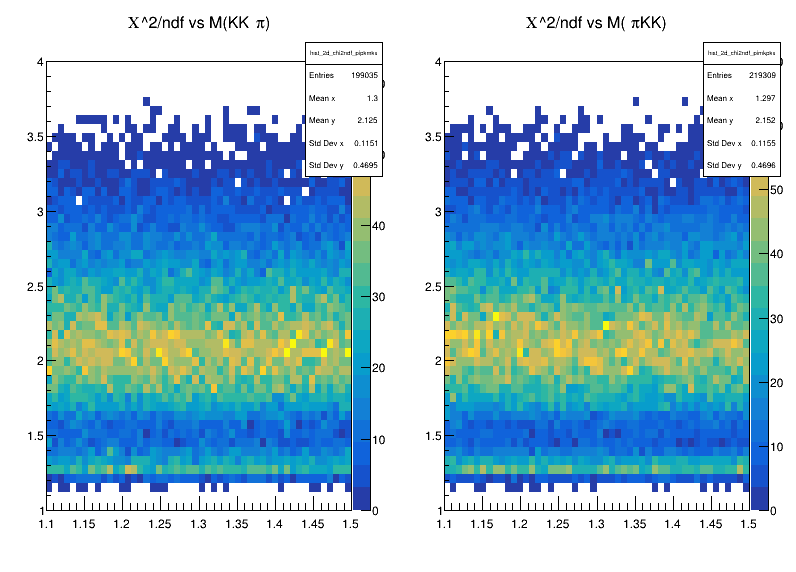

In [25]:
c1.cd(1)
hist_2d_chi2ndf_pipkmks.Draw('colz')
c1.cd(2)
hist_2d_chi2ndf_pimkpks.Draw('colz')
c1.Draw()

In [26]:
hist_pipkmks_pion_track, hist_pimkpks_pion_track, hist_pipkmks_pion_time, hist_pimkpks_pion_time = get_reduced_chi2_hists(df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS), df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS), 'pion')
hist_pipkmks_kaon_track, hist_pimkpks_kaon_track, hist_pipkmks_kaon_time, hist_pimkpks_kaon_time = get_reduced_chi2_hists(df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS), df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS), 'kaon')
hist_pipkmks_proton_track, hist_pimkpks_proton_track, hist_pipkmks_proton_time, hist_pimkpks_proton_time = get_reduced_chi2_hists(df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS), df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS), 'proton')

In [27]:
c2 = ROOT.TCanvas('c2', 'c2', 800, 600)
c2.Divide(2,2)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


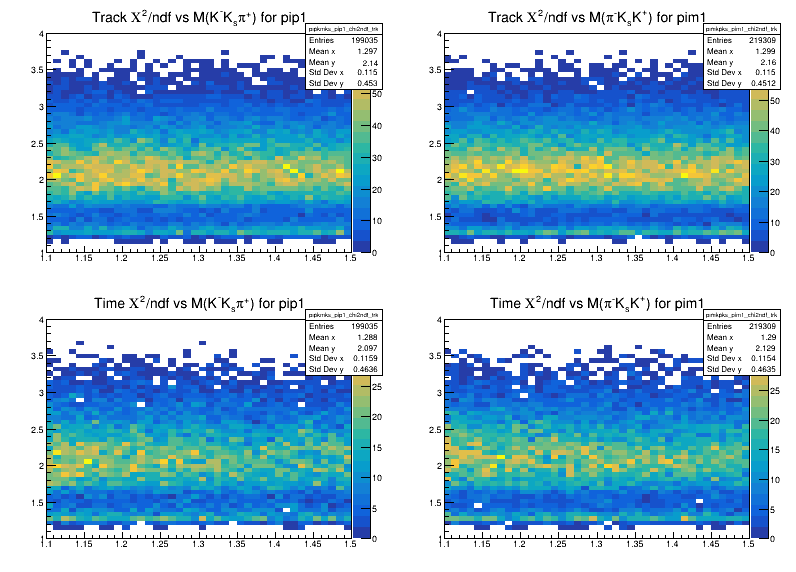

In [28]:
c2.cd(1)
hist_pipkmks_pion_track.Draw('colz')
c2.cd(2)
hist_pimkpks_pion_track.Draw('colz')
c2.cd(3)
hist_pipkmks_pion_time.Draw('colz')
c2.cd(4)
hist_pimkpks_pion_time.Draw('colz')
c2.Draw()


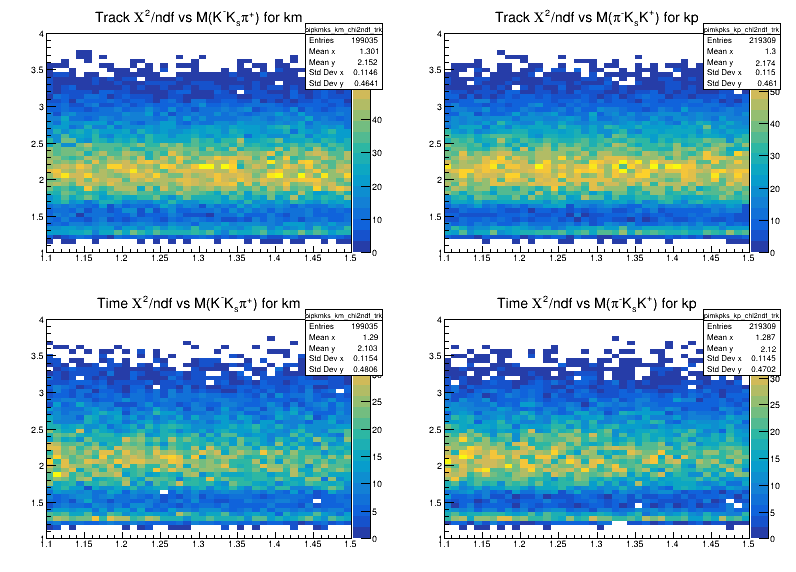

In [29]:
c2.cd(1)
hist_pipkmks_kaon_track.Draw('colz')
c2.cd(2)
hist_pimkpks_kaon_track.Draw('colz')
c2.cd(3)
hist_pipkmks_kaon_time.Draw('colz')
c2.cd(4)
hist_pimkpks_kaon_time.Draw('colz')
c2.Draw()

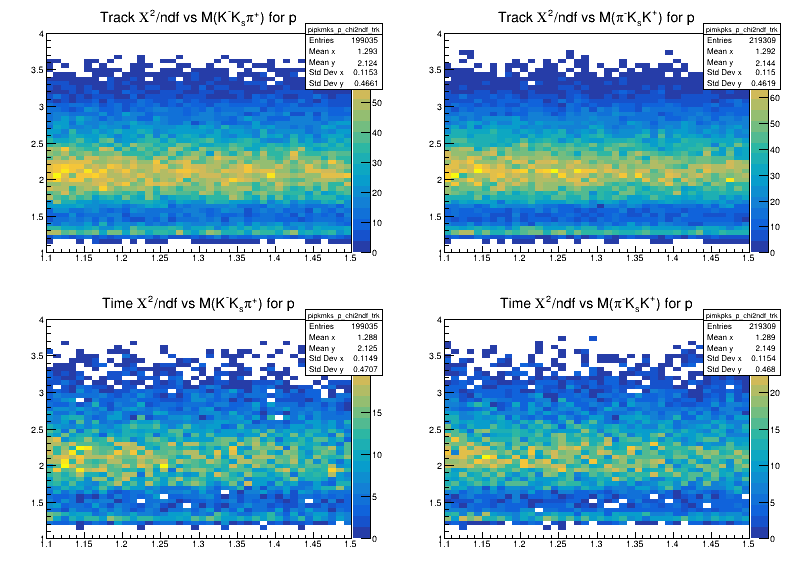

In [30]:
c2.cd(1)
hist_pipkmks_proton_track.Draw('colz')
c2.cd(2)
hist_pimkpks_proton_track.Draw('colz')
c2.cd(3)
hist_pipkmks_proton_time.Draw('colz')
c2.cd(4)
hist_pimkpks_proton_time.Draw('colz')
c2.Draw()